<a href="https://colab.research.google.com/github/IlyaZutler/Project-3-Berlin-Airbnb-Ratings/blob/main/EDA_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

https://www.kaggle.com/datasets/thedevastator/berlin-airbnb-ratings-how-hosts-measure-up

The original dataset contains 450 thousand reviews of 23.5 thousand unique apartments.

The content of the reviews will not be analyzed, but only the characteristics of the apartments.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install openpyxl -q
import openpyxl

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime

# missing data
!pip install missingno -q
import missingno as msno

# for map
!pip install -q folium matplotlib
import folium
from matplotlib.colors import LinearSegmentedColormap, Normalize, to_hex

# for grid
!pip install geopy -q
from geopy.distance import geodesic

!pip install pandas numpy libpysal geopy esda -q
from geopy.distance import great_circle

# for Moran
!pip install pandas numpy libpysal geopy esda -q
import libpysal
from esda.moran import Moran

# Set display options
%matplotlib inline
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', 1000)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 8.2 MB/s eta 0:00:00


In [2]:
apartments_initial = pd.read_excel('https://raw.githubusercontent.com/IlyaZutler/Project-3-Berlin-Airbnb-Ratings/main/apartments.xlsx', engine='openpyxl')

In [3]:
apartments = apartments_initial.copy()

# **EDA Part 1**

### Data Protocol

In [ ]:
# Type of valaues
apartments.dtypes.to_excel("Berlin_datatype.xlsx", sheet_name='data_type')
# Maximum valaues
numeric_apartments = apartments.select_dtypes(include=['number'])
numeric_apartments.max().to_excel("max_Berlin.xlsx", sheet_name='max')
# Minimum Values
numeric_apartments.min().to_excel("min_Berlin.xlsx", sheet_name='min')
# Missing Values
apartments.isnull().sum(axis=0).to_excel("NA_Berlin.xlsx", sheet_name='NA')
# exporting results to the protocol
apartments.nunique().to_excel("unique_Berlin.xlsx", sheet_name='unique')

### Descriptive Statistics

In [ ]:
apartments.shape, apartments['Listing ID'].nunique()

((23536, 33), 23536)

In [ ]:
apartments.isna().sum()

In [ ]:
apartments.info()

In [ ]:
apartments.describe()

In [ ]:
categorical_cols = apartments.select_dtypes(exclude='number').columns
for col in categorical_cols:
  print(f"Value counts for column '{col}' :")
  print(apartments[col].value_counts())
  print(f"NaN values: {apartments[col].isnull().sum()} ")
  print()
  print()

Value counts for column 'Host Since' :
Host Since
08-19-13    59
02-20-17    52
01-17-16    47
02-19-16    39
08-02-16    37
            ..
06-03-11     1
03-28-11     1
10-15-17     1
06-28-11     1
08-25-09     1
Name: count, Length: 3085, dtype: int64
NaN values: 21 


Value counts for column 'Host Response Time' :
Host Response Time
within an hour        6816
within a few hours    2913
within a day          2767
a few days or more     550
Name: count, dtype: int64
NaN values: 10490 


Value counts for column 'Is Superhost' :
Is Superhost
f    19948
t     3567
Name: count, dtype: int64
NaN values: 21 


Value counts for column 'neighbourhood' :
neighbourhood
NeukÃ¶lln                    3444
Prenzlauer Berg              2995
Kreuzberg                    2936
Friedrichshain               2782
Mitte                        2212
Wedding                      1542
SchÃ¶neberg                  1097
Charlottenburg                858
Moabit                        828
Wilmersdorf             

### Autoviz report

In [ ]:
# !pip install autoviz -q
# from autoviz.AutoViz_Class import AutoViz_Class
# %matplotlib inline
# AV = AutoViz_Class()
# AV.AutoViz('', dfte = apartments)

## Data Visualisation

### Missing data

<Axes: >

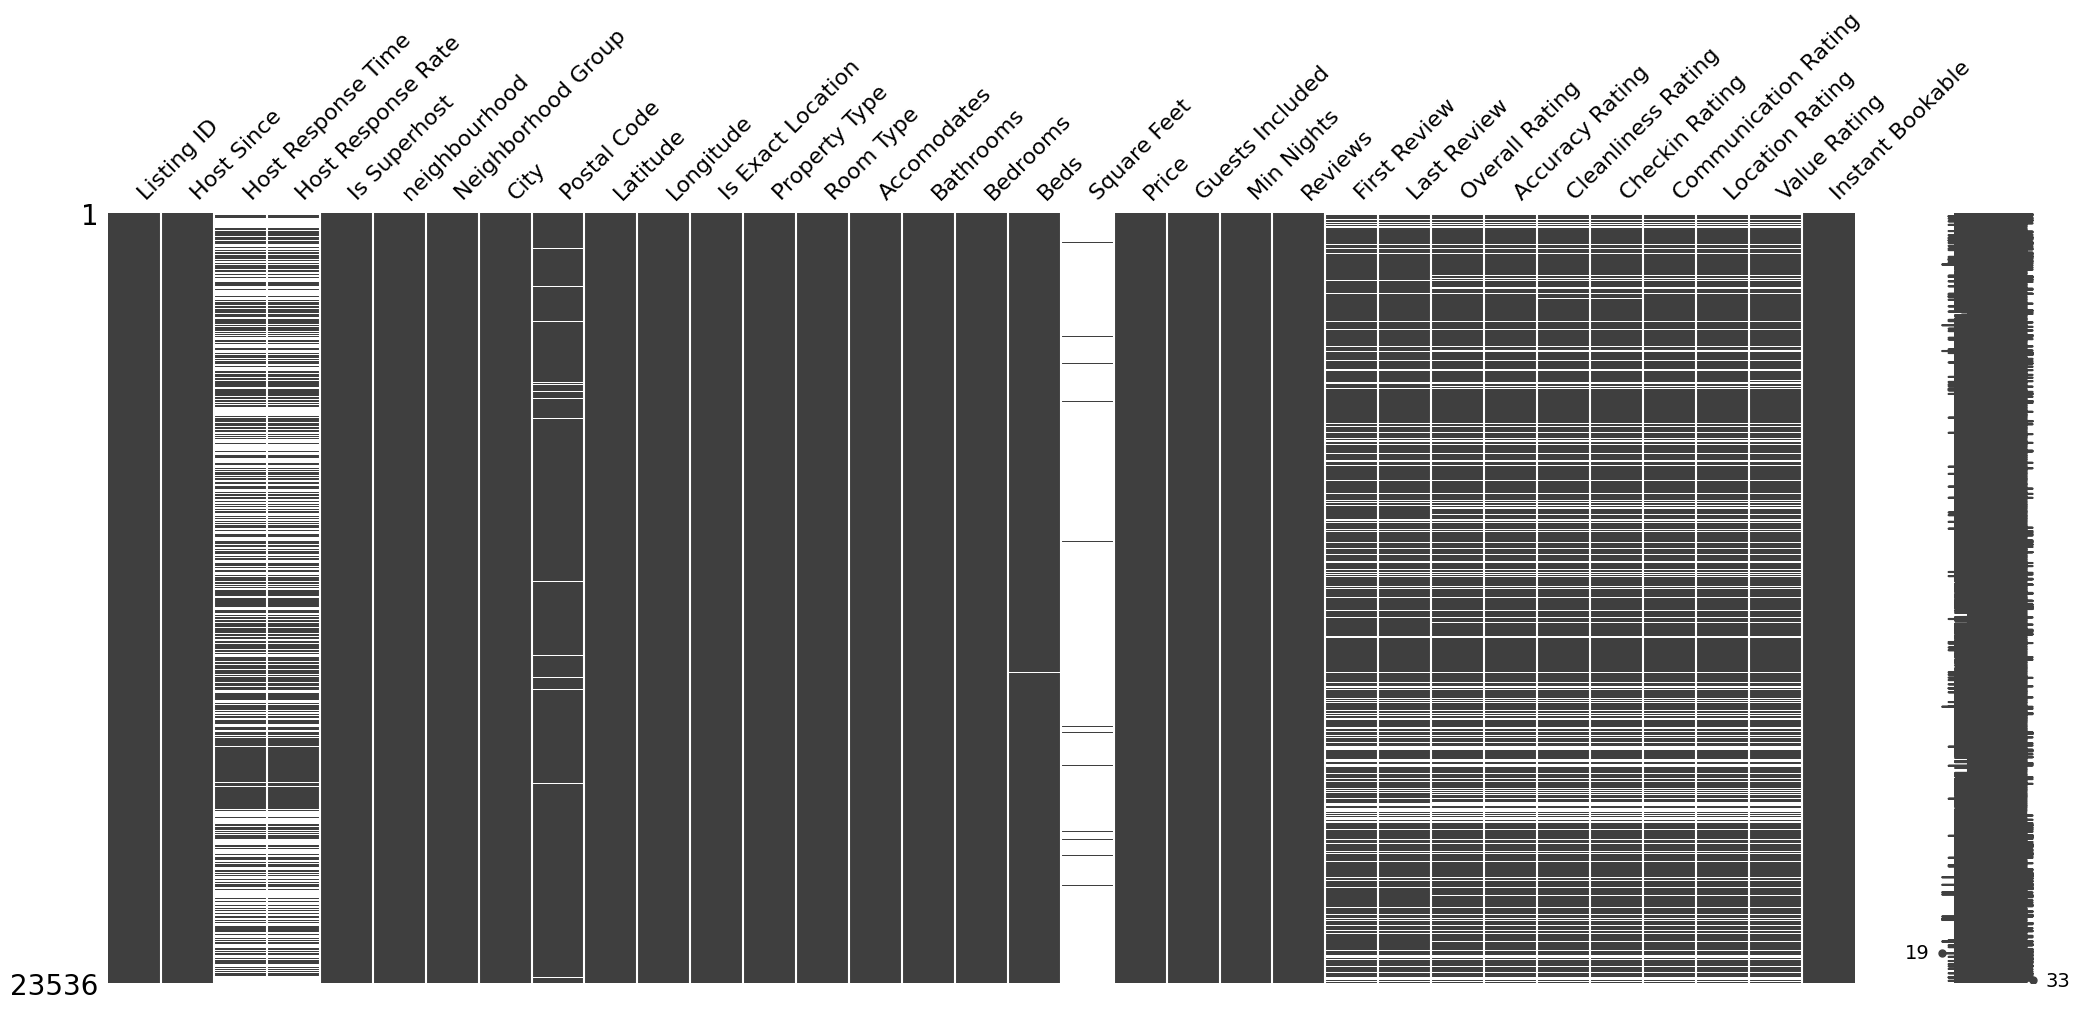

In [ ]:
!pip install missingno -q
import missingno as msno

msno.matrix(apartments)

### Numeric data visualisation

In [4]:
from datetime import datetime

apartments['Host Since'] = pd.to_datetime(apartments['Host Since'])
apartments['First Review'] = pd.to_datetime(apartments['First Review'])
apartments['Last Review'] = pd.to_datetime(apartments['Last Review'])

today = pd.to_datetime(datetime.today().strftime('%Y-%m-%d'))

apartments['Host Since Years'] = (today - apartments['Host Since']).dt.days / 365.25
apartments['Last Review Years'] = (today - apartments['Last Review']).dt.days / 365.25
apartments['First Review Years'] = (today - apartments['First Review']).dt.days / 365.25

In [5]:
apartments['Listing ID'] = apartments['Listing ID'].astype(str)
apartments['Postal Code'] = apartments['Postal Code'].astype(str)

In [6]:
numeric_cols = apartments.select_dtypes(include='number').columns

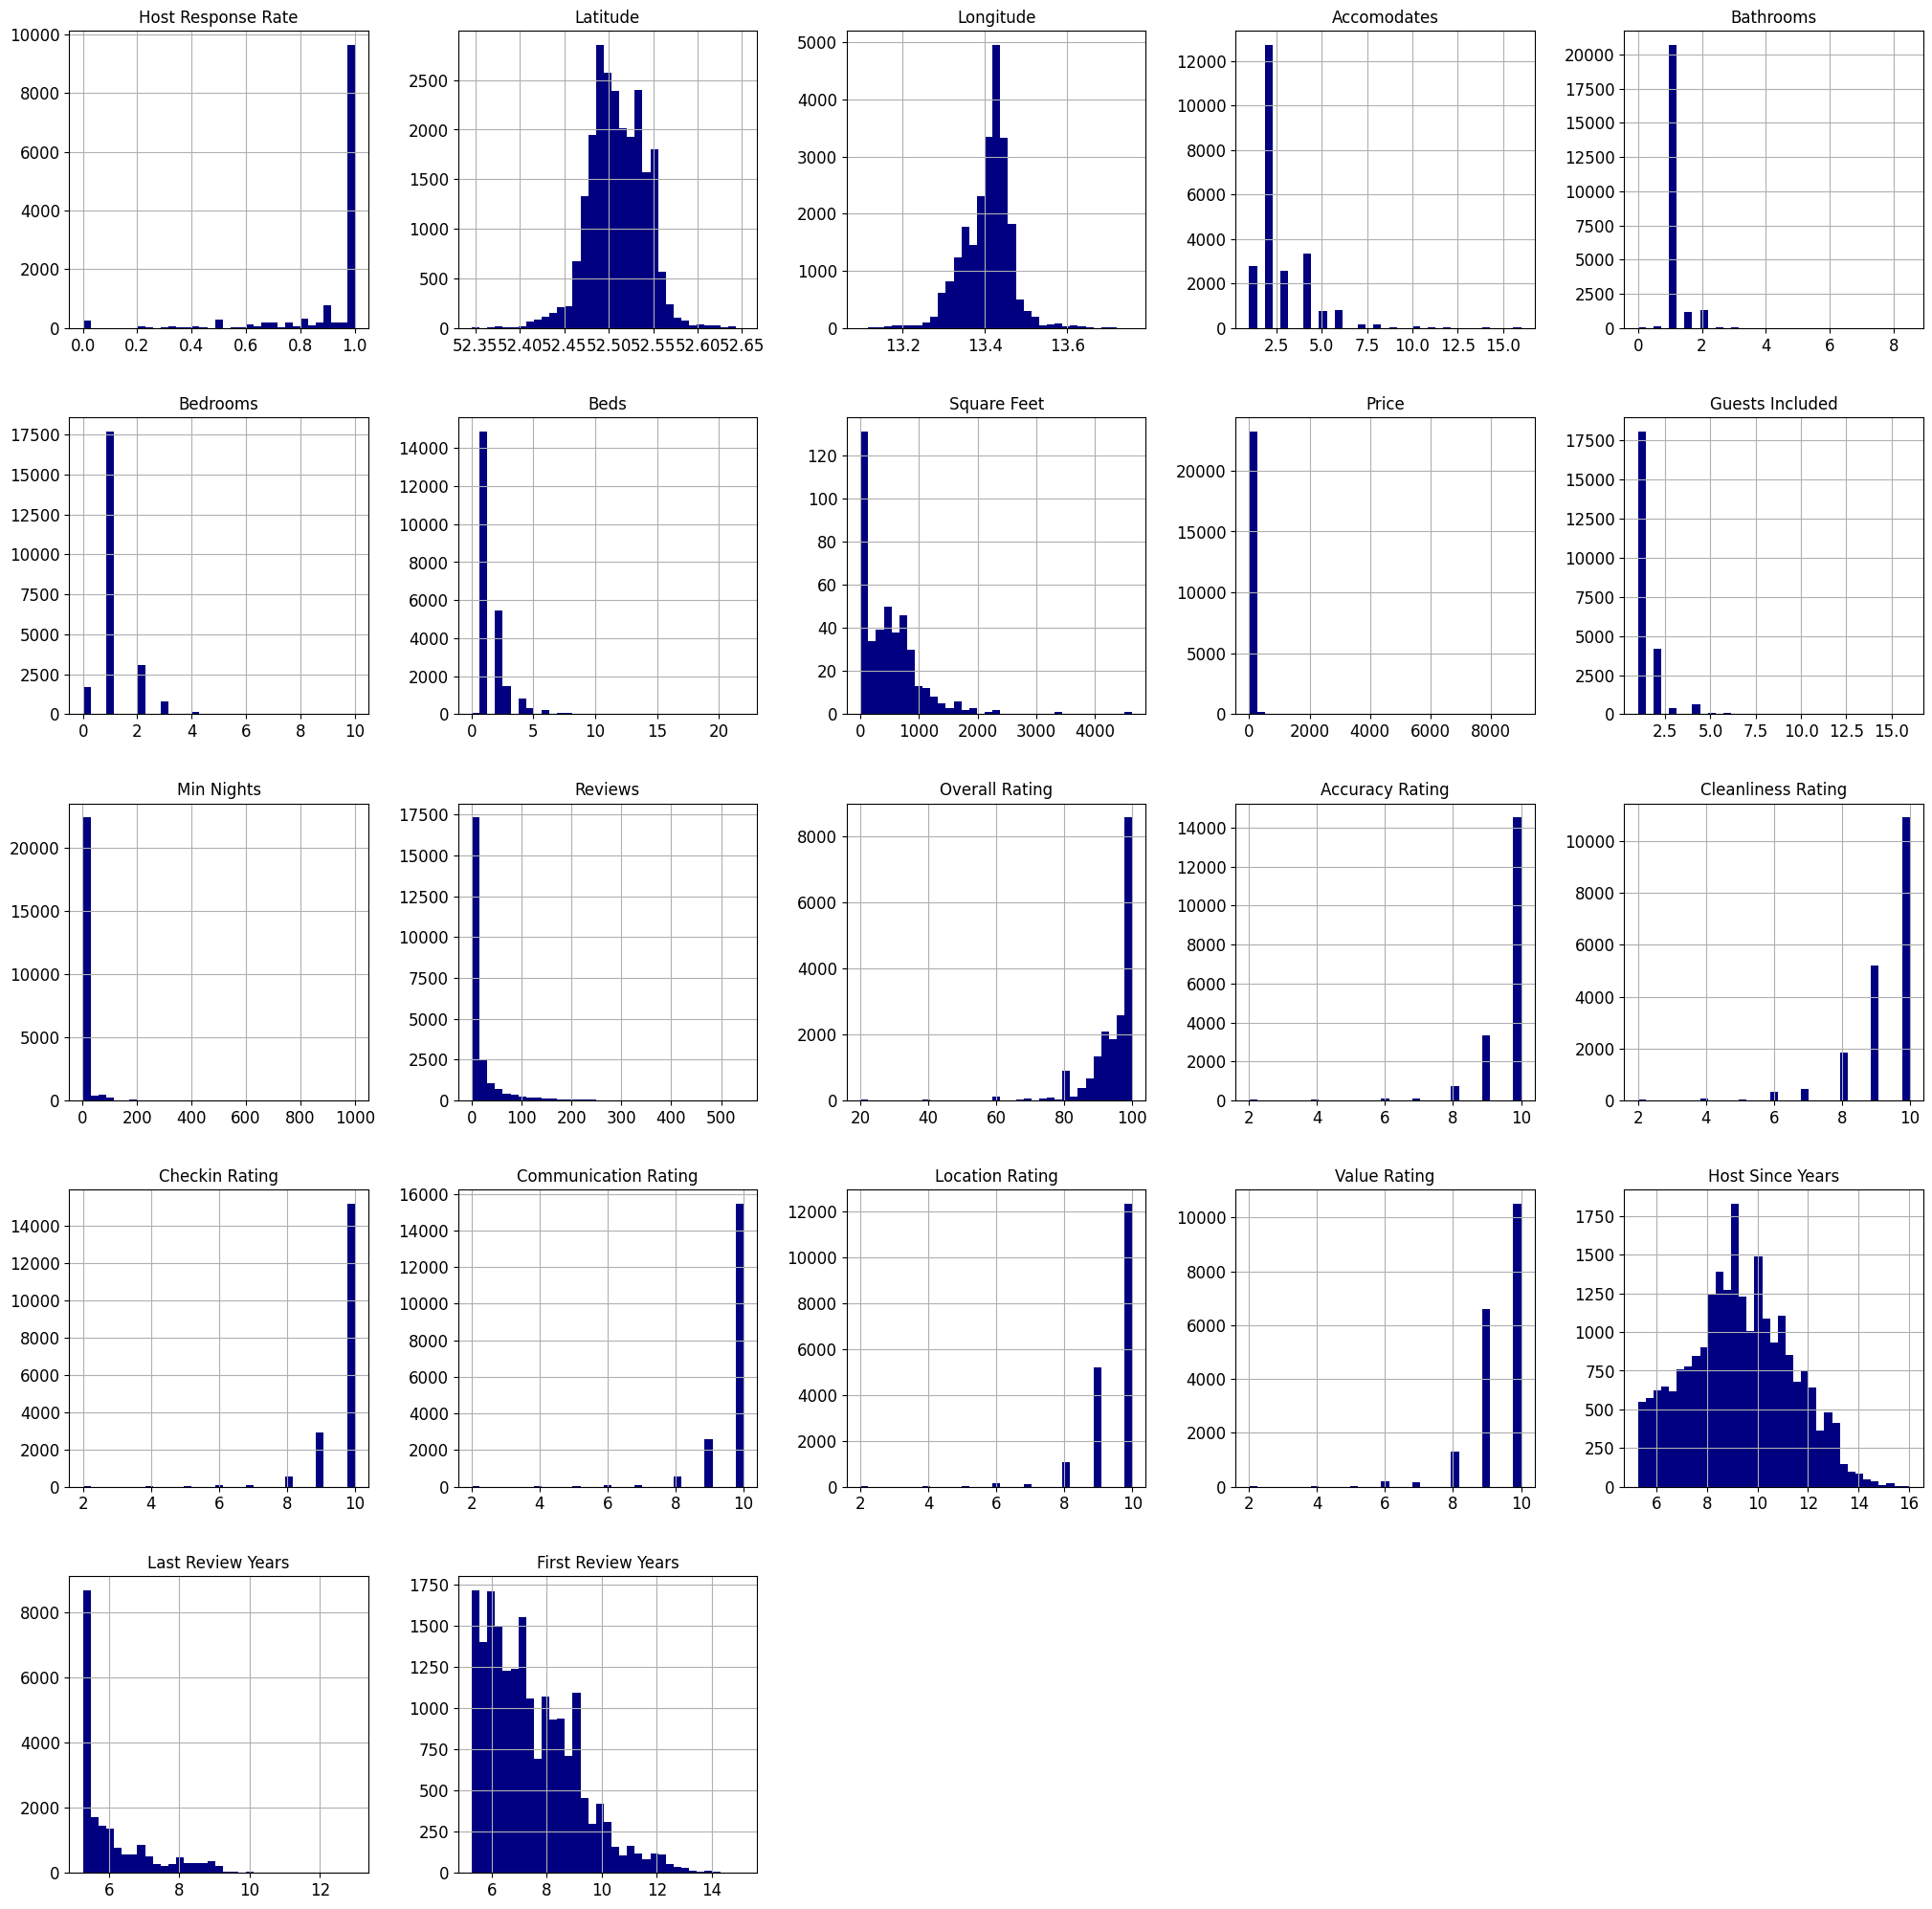

In [7]:
apartments[numeric_cols].hist(figsize=(25, 25), bins=35, xlabelsize=12, ylabelsize=12, color = "navy");

### Pairplot

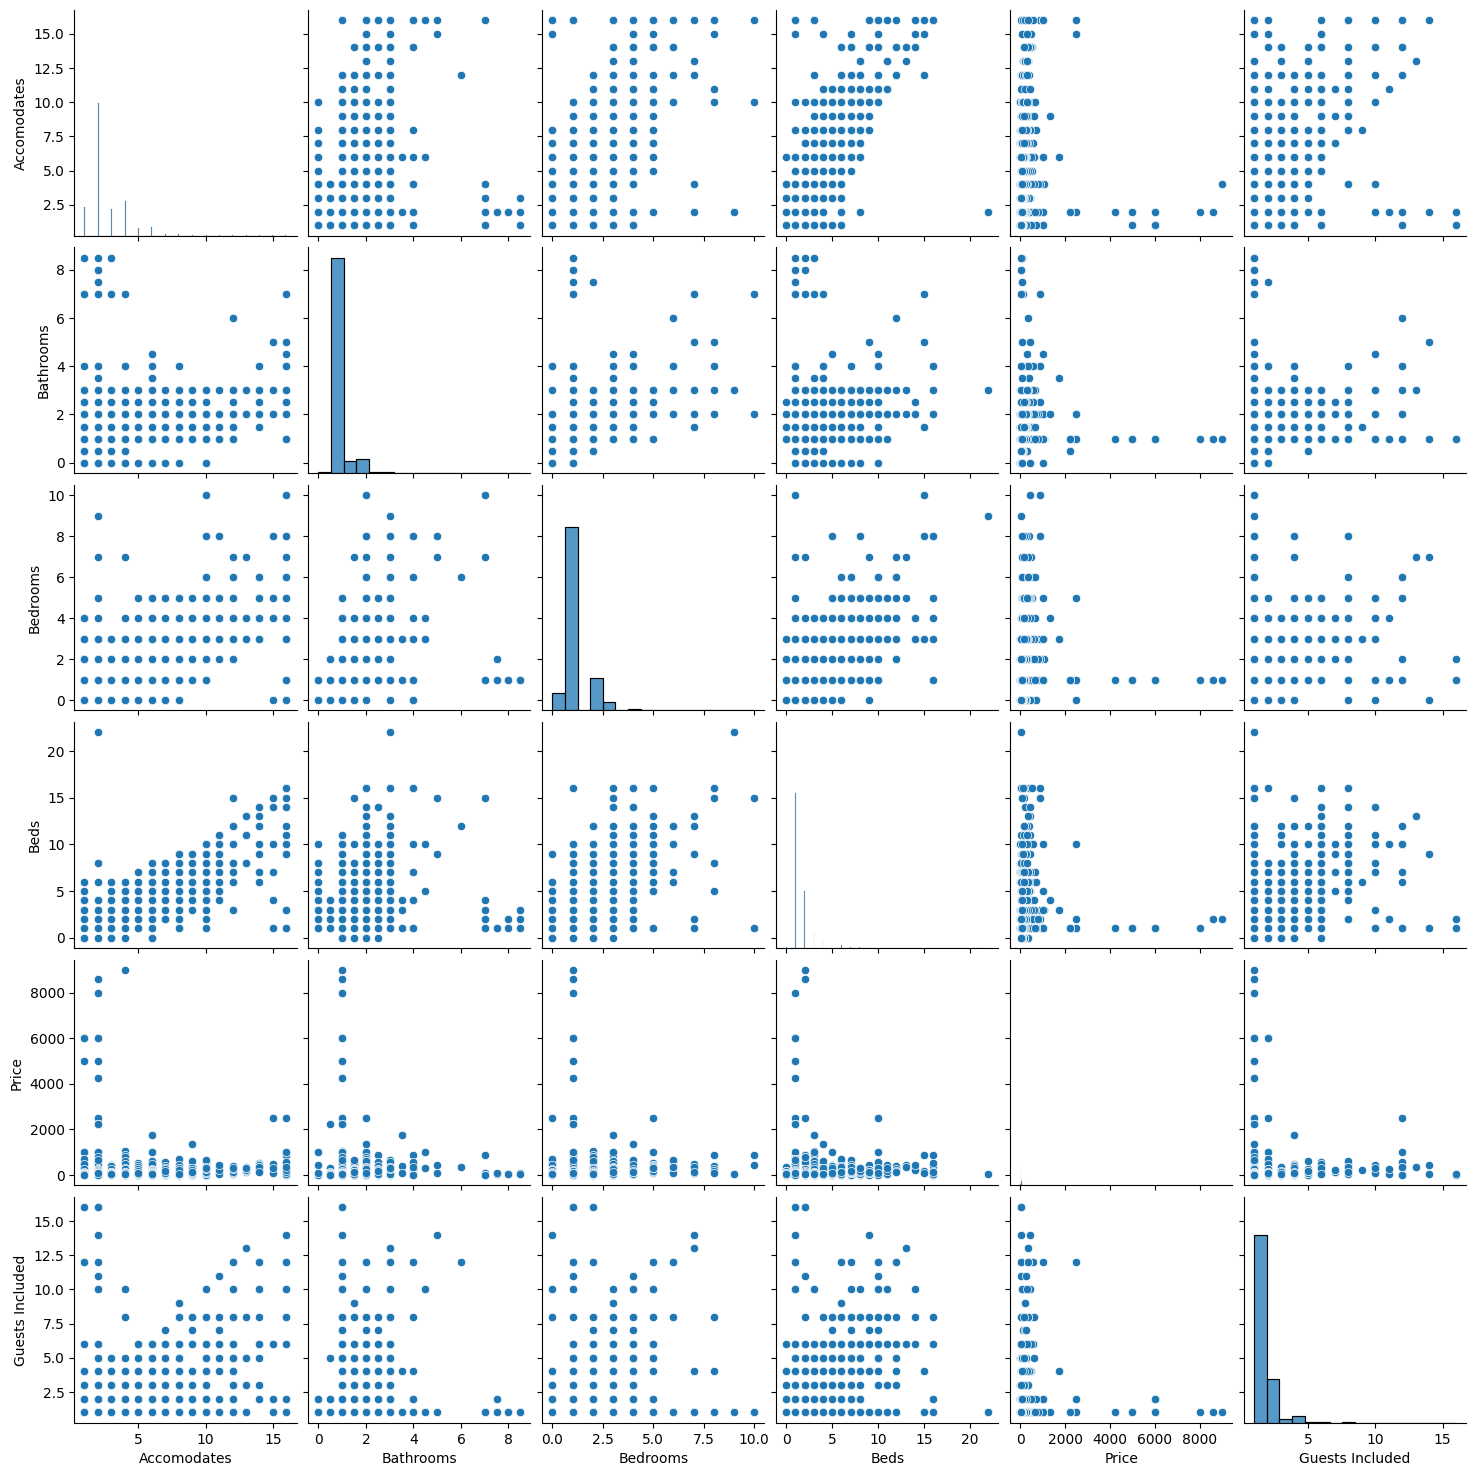

In [8]:
numeric_cols1 = ['Accomodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Guests Included']
sns.pairplot(apartments[numeric_cols1])

### Categorica data visualisation

In [9]:
categorical_cols = apartments.select_dtypes(exclude='number').columns
categorical_cols = categorical_cols.drop(['Listing ID', 'Host Since', 'First Review', 'Last Review', 'Postal Code'])

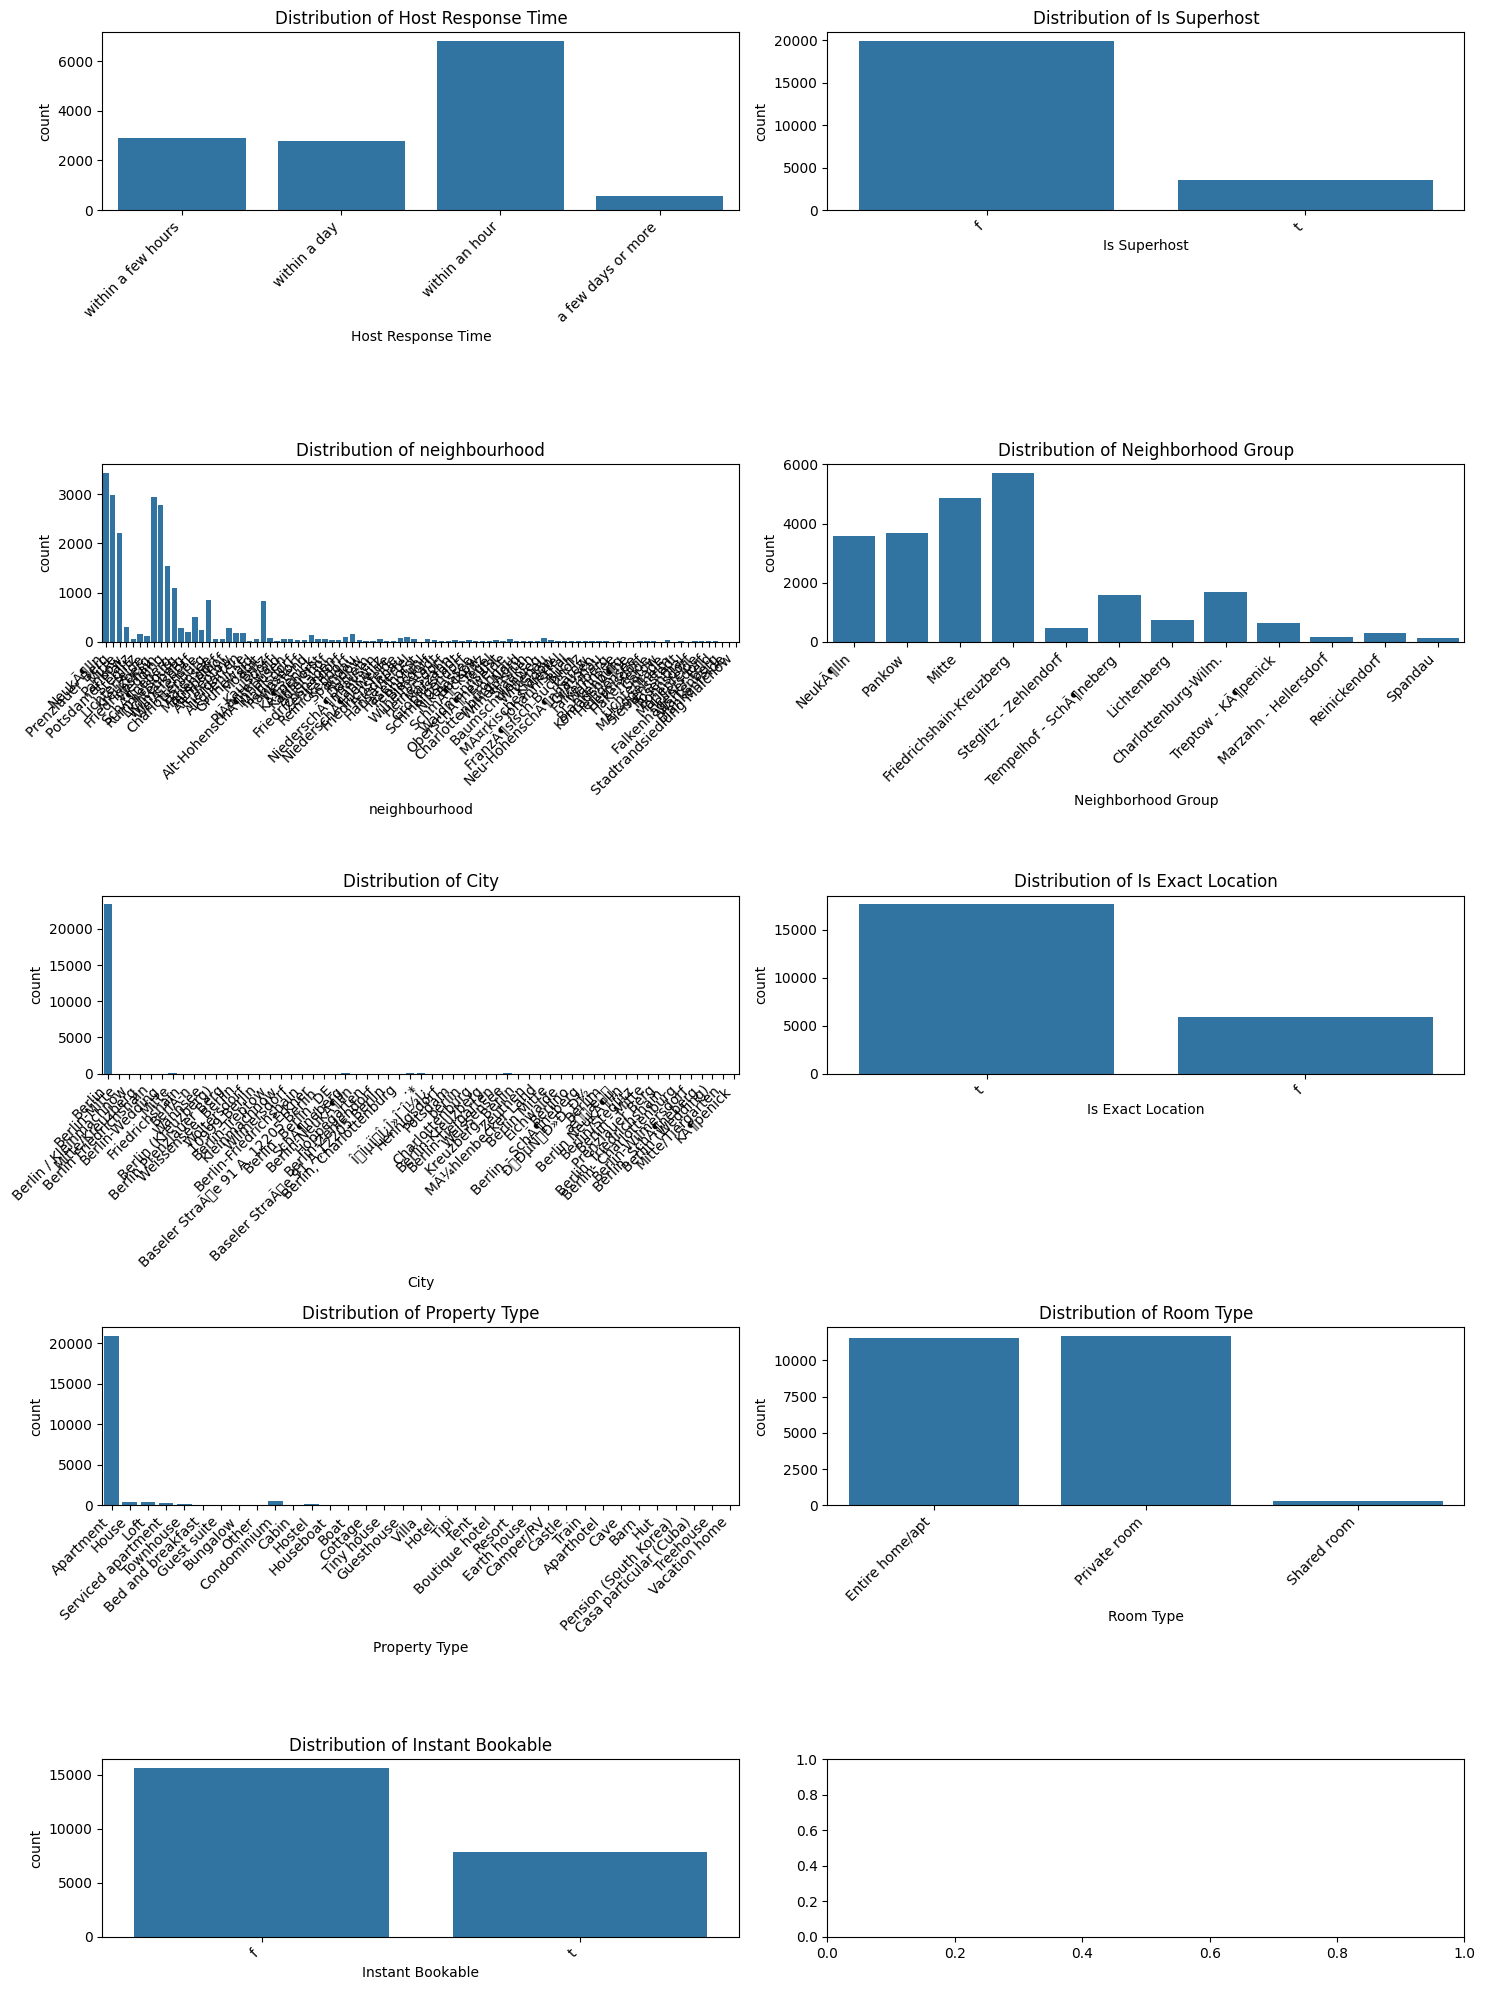

In [10]:
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=apartments, x=col, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Skewness for numeric_cols

In [11]:
skewness_values = apartments[numeric_cols].skew().sort_values()
print(skewness_values)

Communication Rating    -4.747904
Checkin Rating          -4.577088
Accuracy Rating         -4.105561
Overall Rating          -3.390181
Host Response Rate      -3.094403
Value Rating            -2.680106
Location Rating         -2.601043
Cleanliness Rating      -2.478964
Longitude               -0.247408
Latitude                -0.121761
Host Since Years         0.104632
First Review Years       0.909941
Last Review Years        1.505043
Bedrooms                 2.235585
Square Feet              2.326157
Accomodates              2.652933
Beds                     3.661029
Reviews                  4.350674
Guests Included          5.123136
Bathrooms                6.774987
Min Nights              21.513526
Price                   26.846364
dtype: float64


## Correlations

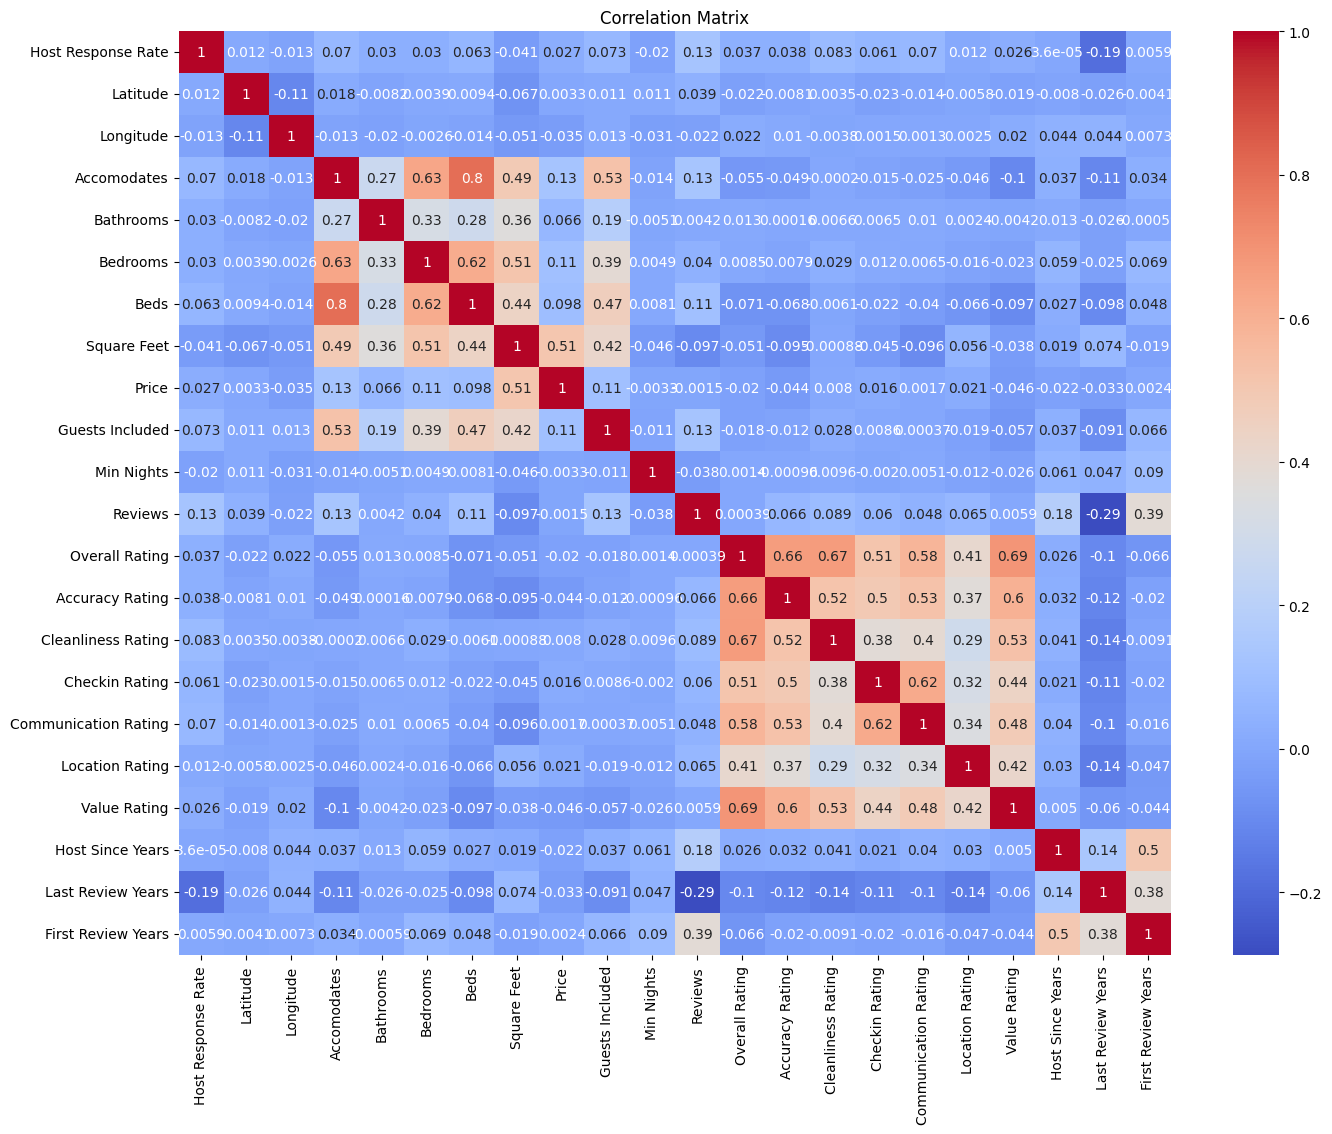

In [12]:
numeric_cols = apartments.select_dtypes(include='number').columns

corr_matrix = apartments[numeric_cols].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## t-test for Neighborhood Group by Price

In [13]:
apartments.groupby('Neighborhood Group')['Price'].agg(['count', 'mean', 'std']).sort_values(by='count', ascending=False)

,count,mean,std
Neighborhood Group,,,
Friedrichshain-Kreuzberg,5726,63.669403,130.526143
Mitte,4865,72.411922,90.419254
Pankow,3687,71.902631,139.465741
NeukÃ¶lln,3587,48.189573,34.763792
Charlottenburg-Wilm.,1676,111.727327,510.850024
Tempelhof - SchÃ¶neberg,1586,98.278058,473.577261
Lichtenberg,743,66.970390,345.999017
Treptow - KÃ¶penick,626,53.988818,40.053303
Steglitz - Zehlendorf,468,58.905983,57.051085


In [14]:
from scipy import stats

neighborhood_groups = apartments['Neighborhood Group'].unique()
p_values = pd.DataFrame(index=neighborhood_groups, columns=neighborhood_groups)

for group1 in neighborhood_groups:
  for group2 in neighborhood_groups:
    if group1 != group2:
      group1_prices = apartments[apartments['Neighborhood Group'] == group1]['Price']
      group2_prices = apartments[apartments['Neighborhood Group'] == group2]['Price']
      t_statistic, p_value = stats.ttest_ind(group1_prices, group2_prices, equal_var=False)
      p_values.loc[group1, group2] = round(p_value, 3)

p_values.fillna('', inplace=True)
shortened_names = {name: name[:10] for name in neighborhood_groups}
p_values.rename(index=shortened_names, columns=shortened_names, inplace=True)
p_values


,NeukÃ¶lln,Pankow,Mitte,Friedrichs,Steglitz -,Tempelhof,Lichtenber,Charlotten,Treptow -,Marzahn -,Reinickend,Spandau
NeukÃ¶lln,,0.0,0.0,0.0,0.0,0.0,0.14,0.0,0.001,0.002,0.068,0.073
Pankow,0.0,,0.847,0.004,0.0,0.03,0.702,0.002,0.0,0.007,0.0,0.002
Mitte,0.0,0.847,,0.0,0.0,0.031,0.67,0.002,0.0,0.002,0.0,0.0
Friedrichs,0.0,0.004,0.0,,0.131,0.004,0.797,0.0,0.0,0.372,0.0,0.111
Steglitz -,0.0,0.0,0.0,0.131,,0.001,0.534,0.0,0.111,0.819,0.0,0.588
Tempelhof,0.0,0.03,0.031,0.004,0.001,,0.072,0.435,0.0,0.002,0.0,0.001
Lichtenber,0.14,0.702,0.67,0.797,0.534,0.072,,0.012,0.311,0.597,0.085,0.42
Charlotten,0.0,0.002,0.002,0.0,0.0,0.435,0.012,,0.0,0.0,0.0,0.0
Treptow -,0.001,0.0,0.0,0.0,0.111,0.0,0.311,0.0,,0.147,0.0,0.644
Marzahn -,0.002,0.007,0.002,0.372,0.819,0.002,0.597,0.0,0.147,,0.0,0.509


In [ ]:
apartments.to_excel('apartments_2.xlsx', index=False)

-------------------end of EDA Part 1-----------------------